In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
from odapi.toolbox.psychro import Constants, Mix

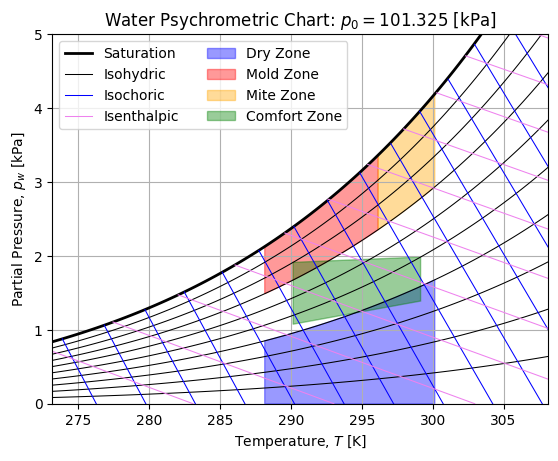

In [3]:
axe = Mix.plot()

In [4]:
df = pd.read_csv('Psychro_data.csv', header=[0,1], index_col=0, parse_dates=[0])
df.iloc[:6,:6]

channel             battery_status                                          \
device_name              node-T001 node-T002 node-T003 node-T004 node-T005   
timestamp                                                                    
2019-10-26 18:15:00            3.0       3.0       3.0       3.0       NaN   
2019-10-26 18:30:00            3.0       3.0       3.0       3.0       NaN   
2019-10-26 18:45:00            3.0       3.0       3.0       3.0       NaN   
2019-10-26 19:00:00            3.0       3.0       3.0       3.0       NaN   
2019-10-26 19:15:00            3.0       3.0       3.0       3.0       NaN   
2019-10-26 19:30:00            3.0       3.0       3.0       3.0       NaN   

channel             battery_voltage  
device_name               node-T001  
timestamp                            
2019-10-26 18:15:00        3.108000  
2019-10-26 18:30:00        3.106667  
2019-10-26 18:45:00        3.106000  
2019-10-26 19:00:00        3.106000  
2019-10-26 19:15:00        3.105333  
2019-10-26 19:30:00        3.104000

In [5]:
T = df['node_temperature'] + Constants.T0K
T.columns = pd.MultiIndex.from_product([['T'], T.columns])
T.head()

T                                            
device_name           node-T001   node-T002 node-T003   node-T004 node-T005
timestamp                                                                  
2019-10-26 18:15:00  291.265000  293.345000    293.20  294.885000       NaN
2019-10-26 18:30:00  291.226667  293.303333    293.16  294.863333       NaN
2019-10-26 18:45:00  291.203333  293.263333    293.13  294.840000       NaN
2019-10-26 19:00:00  291.290000  293.240000    293.10  294.813333       NaN
2019-10-26 19:15:00  291.206667  293.200000    293.07  294.786667       NaN

In [6]:
RH = df['node_humidity']/100.
RH.columns = pd.MultiIndex.from_product([['RH'], RH.columns])
RH.head()

RH                                        
device_name         node-T001 node-T002 node-T003 node-T004 node-T005
timestamp                                                            
2019-10-26 18:15:00  0.599500  0.741500  0.736500  0.691000       NaN
2019-10-26 18:30:00  0.601333  0.739333  0.734667  0.692000       NaN
2019-10-26 18:45:00  0.606667  0.739333  0.734000  0.691333       NaN
2019-10-26 19:00:00  0.607000  0.738333  0.733000  0.691333       NaN
2019-10-26 19:15:00  0.609000  0.736333  0.731667  0.692000       NaN

In [7]:
pw = pd.DataFrame(Mix.pisow(T.values , phi=RH.values)/1000., columns = T['T'].columns, index = T.index)
pw.columns = pd.MultiIndex.from_product([['pw'], pw.columns])
pw.head()

pw                                        
device_name         node-T001 node-T002 node-T003 node-T004 node-T005
timestamp                                                            
2019-10-26 18:15:00  1.528387  2.129416  2.097691  2.164907       NaN
2019-10-26 18:30:00  1.529676  2.118171  2.087712  2.165399       NaN
2019-10-26 18:45:00  1.541168  2.113359  2.082260  2.160476       NaN
2019-10-26 19:00:00  1.549739  2.107702  2.075875  2.157237       NaN
2019-10-26 19:15:00  1.547393  2.097216  2.068563  2.156079       NaN

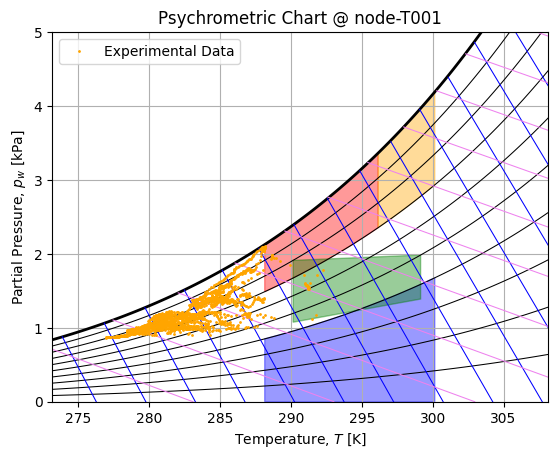

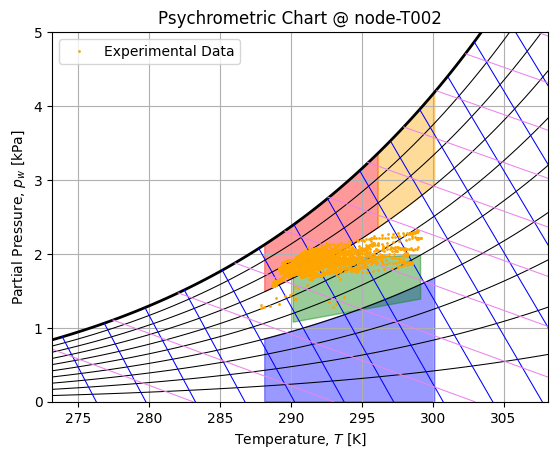

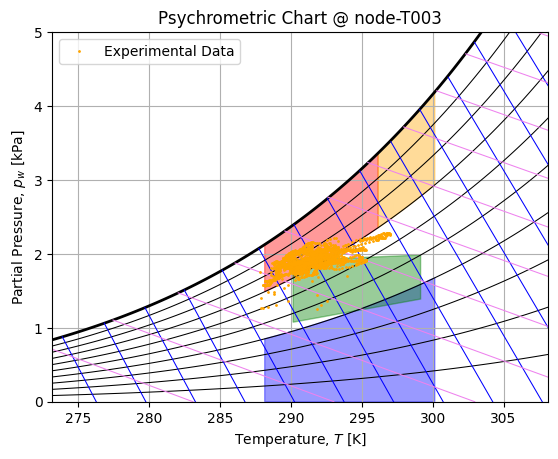

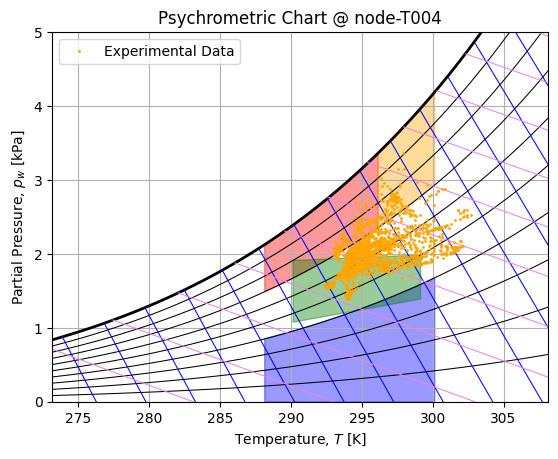

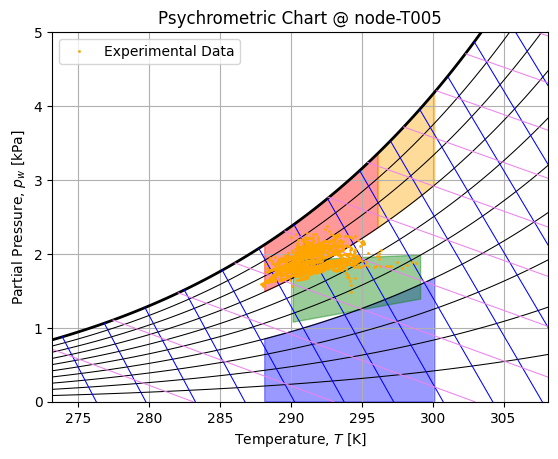

In [13]:
for k in T.columns.levels[-1]:
    idx = pd.IndexSlice[:,k]
    axe = Mix.plot()
    #axe.set_title(r"{} @ {}".format(axe.get_title(), k))
    axe.set_title(r"Psychrometric Chart @ {}".format(k))
    axe.plot(T.loc[:,idx].values.ravel(), pw.loc[:,idx].values.ravel(), '.',
             markersize=2, color='orange', label='Experimental Data')
    axe.legend()#bbox_to_anchor=(1,1), loc='upper left')